In [1]:
import numpy as np 
import pandas as pd 
import string 
import spacy
from matplotlib.pyplot import imread
from matplotlib import pyplot as plt
from wordcloud import WordCloud
%matplotlib inline
from nltk.corpus import stopwords
from textblob import TextBlob
from textblob import Word
import nltk
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\NAMRATA\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\NAMRATA\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [2]:
data=pd.read_csv("C:/Users/NAMRATA/Downloads/reviews.csv")
data

,ID,Username,ProfileURL,Rate,RateText,Format,Title,Content,Helpful,Date,Thumbnails,Images,Video,Verified,ReviewURL
0,RVNKNRZDXNNJA,mani teja,https://www.amazon.in/gp/profile/amzn1.account...,4,4.0 out of 5 stars,Colour: Legendary Track DesignStyle name: 8GB ...,Good mobile,\n Overall good phone\n,NaN,Reviewed in India on 12 July 2021,NaN,NaN,NaN,Verified Purchase,https://www.amazon.in/gp/customer-reviews/RVNK...
1,R2KS1QQ6XHOG2H,Adarsh p,https://www.amazon.in/gp/profile/amzn1.account...,5,5.0 out of 5 stars,Colour: Legendary Track DesignStyle name: 12GB...,Awesome phone but needs some improvements,\n ProsGood audio and vedio quality26mins to ...,NaN,Reviewed in India on 12 July 2021,NaN,NaN,NaN,Verified Purchase,https://www.amazon.in/gp/customer-reviews/R2KS...
2,R24CXVNLHRGMMH,Amazon Customer,https://www.amazon.in/gp/profile/amzn1.account...,5,5.0 out of 5 stars,Colour: Legendary Track DesignStyle name: 12GB...,Value for money,\n Overall mind blowing\n,NaN,Reviewed in India on 12 July 2021,NaN,NaN,NaN,Verified Purchase,https://www.amazon.in/gp/customer-reviews/R24C...
3,R15NVH8NC7FD1X,Suraj thakur,https://www.amazon.in/gp/profile/amzn1.account...,5,5.0 out of 5 stars,Colour: Legendary Track DesignStyle name: 12GB...,All rounder phone....,\n Beast\n,NaN,Reviewed in India on 12 July 2021,NaN,NaN,NaN,Verified Purchase,https://www.amazon.in/gp/customer-reviews/R15N...
4,R30RO56GL2NJSB,amit kumar,https://www.amazon.in/gp/profile/amzn1.account...,5,5.0 out of 5 stars,Colour: Legendary Track DesignStyle name: 8GB ...,Must buy this.,\n Nyc phone\n,NaN,Reviewed in India on 12 July 2021,NaN,NaN,NaN,Verified Purchase,https://www.amazon.in/gp/customer-reviews/R30R...
5,R1TBNMSNRU3R7N,Amazon Customer,https://www.amazon.in/gp/profile/amzn1.account...,4,4.0 out of 5 stars,Colour: Legendary Track DesignStyle name: 12GB...,Best smartphone with SD888,"\n SD888 and EIS,OIS\n",NaN,Reviewed in India on 12 July 2021,https://images-na.ssl-images-amazon.com/images...,https://images-na.ssl-images-amazon.com/images...,NaN,Verified Purchase,https://www.amazon.in/gp/customer-reviews/R1TB...
6,R32OG1ODNCFFJ5,Anand Kumar T,https://www.amazon.in/gp/profile/amzn1.account...,5,5.0 out of 5 stars,Colour: Legendary Track DesignStyle name: 12GB...,Overall a good spec heavy mobile but lags in s...,\n I have been using this mobile for almost 2...,NaN,Reviewed in India on 12 July 2021,NaN,NaN,NaN,Verified Purchase,https://www.amazon.in/gp/customer-reviews/R32O...
7,R23ERV5J49KI9R,Jayraj Patel,https://www.amazon.in/gp/profile/amzn1.account...,5,5.0 out of 5 stars,Colour: Legendary Track DesignStyle name: 12GB...,Flagship killer,\n Good phone\n,NaN,Reviewed in India on 12 July 2021,NaN,NaN,NaN,NaN,https://www.amazon.in/gp/customer-reviews/R23E...
8,REQ1V1GQZU339,MUTHASWIN RM,https://www.amazon.in/gp/profile/amzn1.account...,4,4.0 out of 5 stars,Colour: Legendary Track DesignStyle name: 12GB...,Awesome mobile for this price range,\n Fingerprint reader is quick and good. Batt...,NaN,Reviewed in India on 12 July 2021,NaN,NaN,NaN,Verified Purchase,https://www.amazon.in/gp/customer-reviews/REQ1...
9,R2S63RPDGDZNGI,Hemanth,https://www.amazon.in/gp/profile/amzn1.account...,5,5.0 out of 5 stars,Colour: Legendary Track DesignStyle name: 12GB...,Overall performance is of the value,\n Quite comfortable in hand but heat's up ra...,NaN,Reviewed in India on 12 July 2021,NaN,NaN,NaN,Verified Purchase,https://www.amazon.in/gp/customer-reviews/R2S6...


Number of Words

In [3]:
#Number of Words in single review
data['word_count'] = data['Title'].apply(lambda x: len(str(x).split(" ")))
data[['Title','word_count']].head()

,Title,word_count
0,Good mobile,2
1,Awesome phone but needs some improvements,6
2,Value for money,3
3,All rounder phone....,3
4,Must buy this.,3


In [4]:
#Number of characters in single review including spaces
data['char_count'] = data['Title'].str.len() 
data[['Title','char_count']].head()

,Title,char_count
0,Good mobile,11
1,Awesome phone but needs some improvements,41
2,Value for money,15
3,All rounder phone....,21
4,Must buy this.,14


Number of Stopwords

In [5]:
stop = stopwords.words('english')

data['stopwords'] = data['Title'].apply(lambda x: len([x for x in x.split() if x in stop]))
data[['Title','stopwords']].head()

,Title,stopwords
0,Good mobile,0
1,Awesome phone but needs some improvements,2
2,Value for money,1
3,All rounder phone....,0
4,Must buy this.,0


In [8]:
# Total no.of stopwords in given dataset

In [6]:
data['stopwords'].sum()

49

Converting to lower case

In [7]:
data['Title'] = data['Title'].apply(lambda x: " ".join(x.lower() for x in x.split()))
data['Title'].head()

0                                  good mobile
1    awesome phone but needs some improvements
2                              value for money
3                        all rounder phone....
4                               must buy this.
Name: Title, dtype: object

In [8]:
data['Title'] = data['Title'].str.replace('[^\w\s]','')
data['Title'].head()

0                                  good mobile
1    awesome phone but needs some improvements
2                              value for money
3                            all rounder phone
4                                must buy this
Name: Title, dtype: object

Removing of Stop Words

In [9]:
stop = stopwords.words('english')
data['Title'] = data['Title'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
data['Title'].head()

0                         good mobile
1    awesome phone needs improvements
2                         value money
3                       rounder phone
4                            must buy
Name: Title, dtype: object

Tokenization

In [10]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\NAMRATA\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [11]:
review=np.array(data['Title'])
s=str(review)
s

"['good mobile' 'awesome phone needs improvements' 'value money'\n 'rounder phone' 'must buy' 'best smartphone sd888'\n 'overall good spec heavy mobile lags software' 'flagship killer'\n 'awesome mobile price range' 'overall performance value'\n 'good performance' 'complete value money product' 'nice companion'\n 'performer lacks battery performance'\n 'worst battery life bad screen time' 'good' 'excellent device'\n 'good phone' 'ok' 'best' 'iqoo 7 legend wow' 'good alrounder'\n 'iqoo beats one plus 9 worth money' 'best value'\n 'buy cost 40k cheap mobile' 'monster performance' 'true class'\n 'perfect flagship mobile magnificent processor super fast charging gaming experience'\n 'master piece' 'best budget flagship phone' 'camera worst'\n 'one word awesome' 'worth'\n 'overall good battery low light dark mode issue desturbing'\n 'extended ram feature' 'fast charging processing beast' 'really legend'\n 'ultimate piece machine' 'new mobile market nice products'\n 'brand value money best' 

In [12]:
from nltk.tokenize import word_tokenize
text_tokens = word_tokenize(s)
print(text_tokens)

['[', "'good", 'mobile', "'", "'awesome", 'phone', 'needs', 'improvements', "'", "'value", "money'", "'rounder", 'phone', "'", "'must", 'buy', "'", "'best", 'smartphone', "sd888'", "'overall", 'good', 'spec', 'heavy', 'mobile', 'lags', 'software', "'", "'flagship", "killer'", "'awesome", 'mobile', 'price', 'range', "'", "'overall", 'performance', "value'", "'good", 'performance', "'", "'complete", 'value', 'money', 'product', "'", "'nice", "companion'", "'performer", 'lacks', 'battery', "performance'", "'worst", 'battery', 'life', 'bad', 'screen', 'time', "'", "'good", "'", "'excellent", "device'", "'good", 'phone', "'", "'ok", "'", "'best", "'", "'iqoo", '7', 'legend', 'wow', "'", "'good", "alrounder'", "'iqoo", 'beats', 'one', 'plus', '9', 'worth', 'money', "'", "'best", "value'", "'buy", 'cost', '40k', 'cheap', 'mobile', "'", "'monster", 'performance', "'", "'true", "class'", "'perfect", 'flagship', 'mobile', 'magnificent', 'processor', 'super', 'fast', 'charging', 'gaming', "experi

Stemming

In [13]:
from nltk.stem import PorterStemmer
st = PorterStemmer()
data['Title'][:5].apply(lambda x: " ".join([st.stem(word) for word in x.split()]))

0                  good mobil
1    awesom phone need improv
2                  valu money
3               rounder phone
4                    must buy
Name: Title, dtype: object

Lemmatization¶

In [14]:
data['Title'] = data['Title'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
data['Title'].head()

0                       good mobile
1    awesome phone need improvement
2                       value money
3                     rounder phone
4                          must buy
Name: Title, dtype: object

Sentiment Analysis

In [15]:
data['sentiment_polarity'] = data['Title'].apply(lambda x: TextBlob(x).sentiment.polarity )
data[['Title','sentiment_polarity']].head()

,Title,sentiment_polarity
0,good mobile,0.7
1,awesome phone need improvement,1.0
2,value money,0.0
3,rounder phone,0.0
4,must buy,0.0


Sentiment

In [16]:
def getAnalysis(score):
  if score < 0:
    return 'Negative'
  elif score == 0:
    return 'Neutral'
  else:
    return 'Positive'
data ['sentiment'] = data  ['sentiment_polarity'].apply(getAnalysis )
data[['Title','sentiment','sentiment_polarity']]

,Title,sentiment,sentiment_polarity
0,good mobile,Positive,0.700000
1,awesome phone need improvement,Positive,1.000000
2,value money,Neutral,0.000000
3,rounder phone,Neutral,0.000000
4,must buy,Neutral,0.000000
5,best smartphone sd888,Positive,1.000000
6,overall good spec heavy mobile lag software,Positive,0.166667
7,flagship killer,Neutral,0.000000
8,awesome mobile price range,Positive,1.000000
9,overall performance value,Neutral,0.000000


In [ ]:
# No.of Negative,Positive and Neutral Tweets in our given data

In [17]:
count=data['sentiment'].value_counts()
count

Positive    34
Neutral     14
Negative     2
Name: sentiment, dtype: int64

In [18]:
data

,ID,Username,ProfileURL,Rate,RateText,Format,Title,Content,Helpful,Date,Thumbnails,Images,Video,Verified,ReviewURL,word_count,char_count,stopwords,sentiment_polarity,sentiment
0,RVNKNRZDXNNJA,mani teja,https://www.amazon.in/gp/profile/amzn1.account...,4,4.0 out of 5 stars,Colour: Legendary Track DesignStyle name: 8GB ...,good mobile,\n Overall good phone\n,NaN,Reviewed in India on 12 July 2021,NaN,NaN,NaN,Verified Purchase,https://www.amazon.in/gp/customer-reviews/RVNK...,2,11,0,0.700000,Positive
1,R2KS1QQ6XHOG2H,Adarsh p,https://www.amazon.in/gp/profile/amzn1.account...,5,5.0 out of 5 stars,Colour: Legendary Track DesignStyle name: 12GB...,awesome phone need improvement,\n ProsGood audio and vedio quality26mins to ...,NaN,Reviewed in India on 12 July 2021,NaN,NaN,NaN,Verified Purchase,https://www.amazon.in/gp/customer-reviews/R2KS...,6,41,2,1.000000,Positive
2,R24CXVNLHRGMMH,Amazon Customer,https://www.amazon.in/gp/profile/amzn1.account...,5,5.0 out of 5 stars,Colour: Legendary Track DesignStyle name: 12GB...,value money,\n Overall mind blowing\n,NaN,Reviewed in India on 12 July 2021,NaN,NaN,NaN,Verified Purchase,https://www.amazon.in/gp/customer-reviews/R24C...,3,15,1,0.000000,Neutral
3,R15NVH8NC7FD1X,Suraj thakur,https://www.amazon.in/gp/profile/amzn1.account...,5,5.0 out of 5 stars,Colour: Legendary Track DesignStyle name: 12GB...,rounder phone,\n Beast\n,NaN,Reviewed in India on 12 July 2021,NaN,NaN,NaN,Verified Purchase,https://www.amazon.in/gp/customer-reviews/R15N...,3,21,0,0.000000,Neutral
4,R30RO56GL2NJSB,amit kumar,https://www.amazon.in/gp/profile/amzn1.account...,5,5.0 out of 5 stars,Colour: Legendary Track DesignStyle name: 8GB ...,must buy,\n Nyc phone\n,NaN,Reviewed in India on 12 July 2021,NaN,NaN,NaN,Verified Purchase,https://www.amazon.in/gp/customer-reviews/R30R...,3,14,0,0.000000,Neutral
5,R1TBNMSNRU3R7N,Amazon Customer,https://www.amazon.in/gp/profile/amzn1.account...,4,4.0 out of 5 stars,Colour: Legendary Track DesignStyle name: 12GB...,best smartphone sd888,"\n SD888 and EIS,OIS\n",NaN,Reviewed in India on 12 July 2021,https://images-na.ssl-images-amazon.com/images...,https://images-na.ssl-images-amazon.com/images...,NaN,Verified Purchase,https://www.amazon.in/gp/customer-reviews/R1TB...,4,26,1,1.000000,Positive
6,R32OG1ODNCFFJ5,Anand Kumar T,https://www.amazon.in/gp/profile/amzn1.account...,5,5.0 out of 5 stars,Colour: Legendary Track DesignStyle name: 12GB...,overall good spec heavy mobile lag software,\n I have been using this mobile for almost 2...,NaN,Reviewed in India on 12 July 2021,NaN,NaN,NaN,Verified Purchase,https://www.amazon.in/gp/customer-reviews/R32O...,10,53,3,0.166667,Positive
7,R23ERV5J49KI9R,Jayraj Patel,https://www.amazon.in/gp/profile/amzn1.account...,5,5.0 out of 5 stars,Colour: Legendary Track DesignStyle name: 12GB...,flagship killer,\n Good phone\n,NaN,Reviewed in India on 12 July 2021,NaN,NaN,NaN,NaN,https://www.amazon.in/gp/customer-reviews/R23E...,2,15,0,0.000000,Neutral
8,REQ1V1GQZU339,MUTHASWIN RM,https://www.amazon.in/gp/profile/amzn1.account...,4,4.0 out of 5 stars,Colour: Legendary Track DesignStyle name: 12GB...,awesome mobile price range,\n Fingerprint reader is quick and good. Batt...,NaN,Reviewed in India on 12 July 2021,NaN,NaN,NaN,Verified Purchase,https://www.amazon.in/gp/customer-reviews/REQ1...,6,35,2,1.000000,Positive
9,R2S63RPDGDZNGI,Hemanth,https://www.amazon.in/gp/profile/amzn1.account...,5,5.0 out of 5 stars,Colour: Legendary Track DesignStyle name: 12GB...,overall performance value,\n Quite comfortable in hand but heat's up ra...,NaN,Reviewed in India on 12 July 2021,NaN,NaN,NaN,Verified Purchase,https://www.amazon.in/gp/customer-reviews/R2S6...,6,35,3,0.000000,Neutral


<BarContainer object of 3 artists>

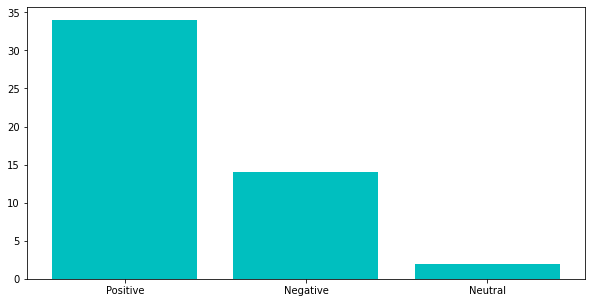

In [19]:
import matplotlib.pyplot as plt

fig=plt.figure(figsize=(10,5))
count=[34,14,2]
senti=['Positive','Negative','Neutral']
plt.bar(senti,count,color='c')

Word Cloud for our tweets

In [20]:
# Joining the list into one string/text
text = ' '.join(data['Title'])
text

'good mobile awesome phone need improvement value money rounder phone must buy best smartphone sd888 overall good spec heavy mobile lag software flagship killer awesome mobile price range overall performance value good performance complete value money product nice companion performer lack battery performance worst battery life bad screen time good excellent device good phone ok best iqoo 7 legend wow good alrounder iqoo beat one plus 9 worth money best value buy cost 40k cheap mobile monster performance true class perfect flagship mobile magnificent processor super fast charging gaming experience master piece best budget flagship phone camera worst one word awesome worth overall good battery low light dark mode issue desturbing extended ram feature fast charging processing beast really legend ultimate piece machine new mobile market nice product brand value money best superb flagship killer mobile good experience wonderful phone competition end phone best phone 40000 network problem fi

In [21]:
# Import packages
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud, STOPWORDS
# Define a function to plot word cloud
def plot_cloud(wordcloud):
    # Set figure size
    plt.figure(figsize=(40, 30))
    # Display image
    plt.imshow(wordcloud) 
    # No axis details
    plt.axis("off");

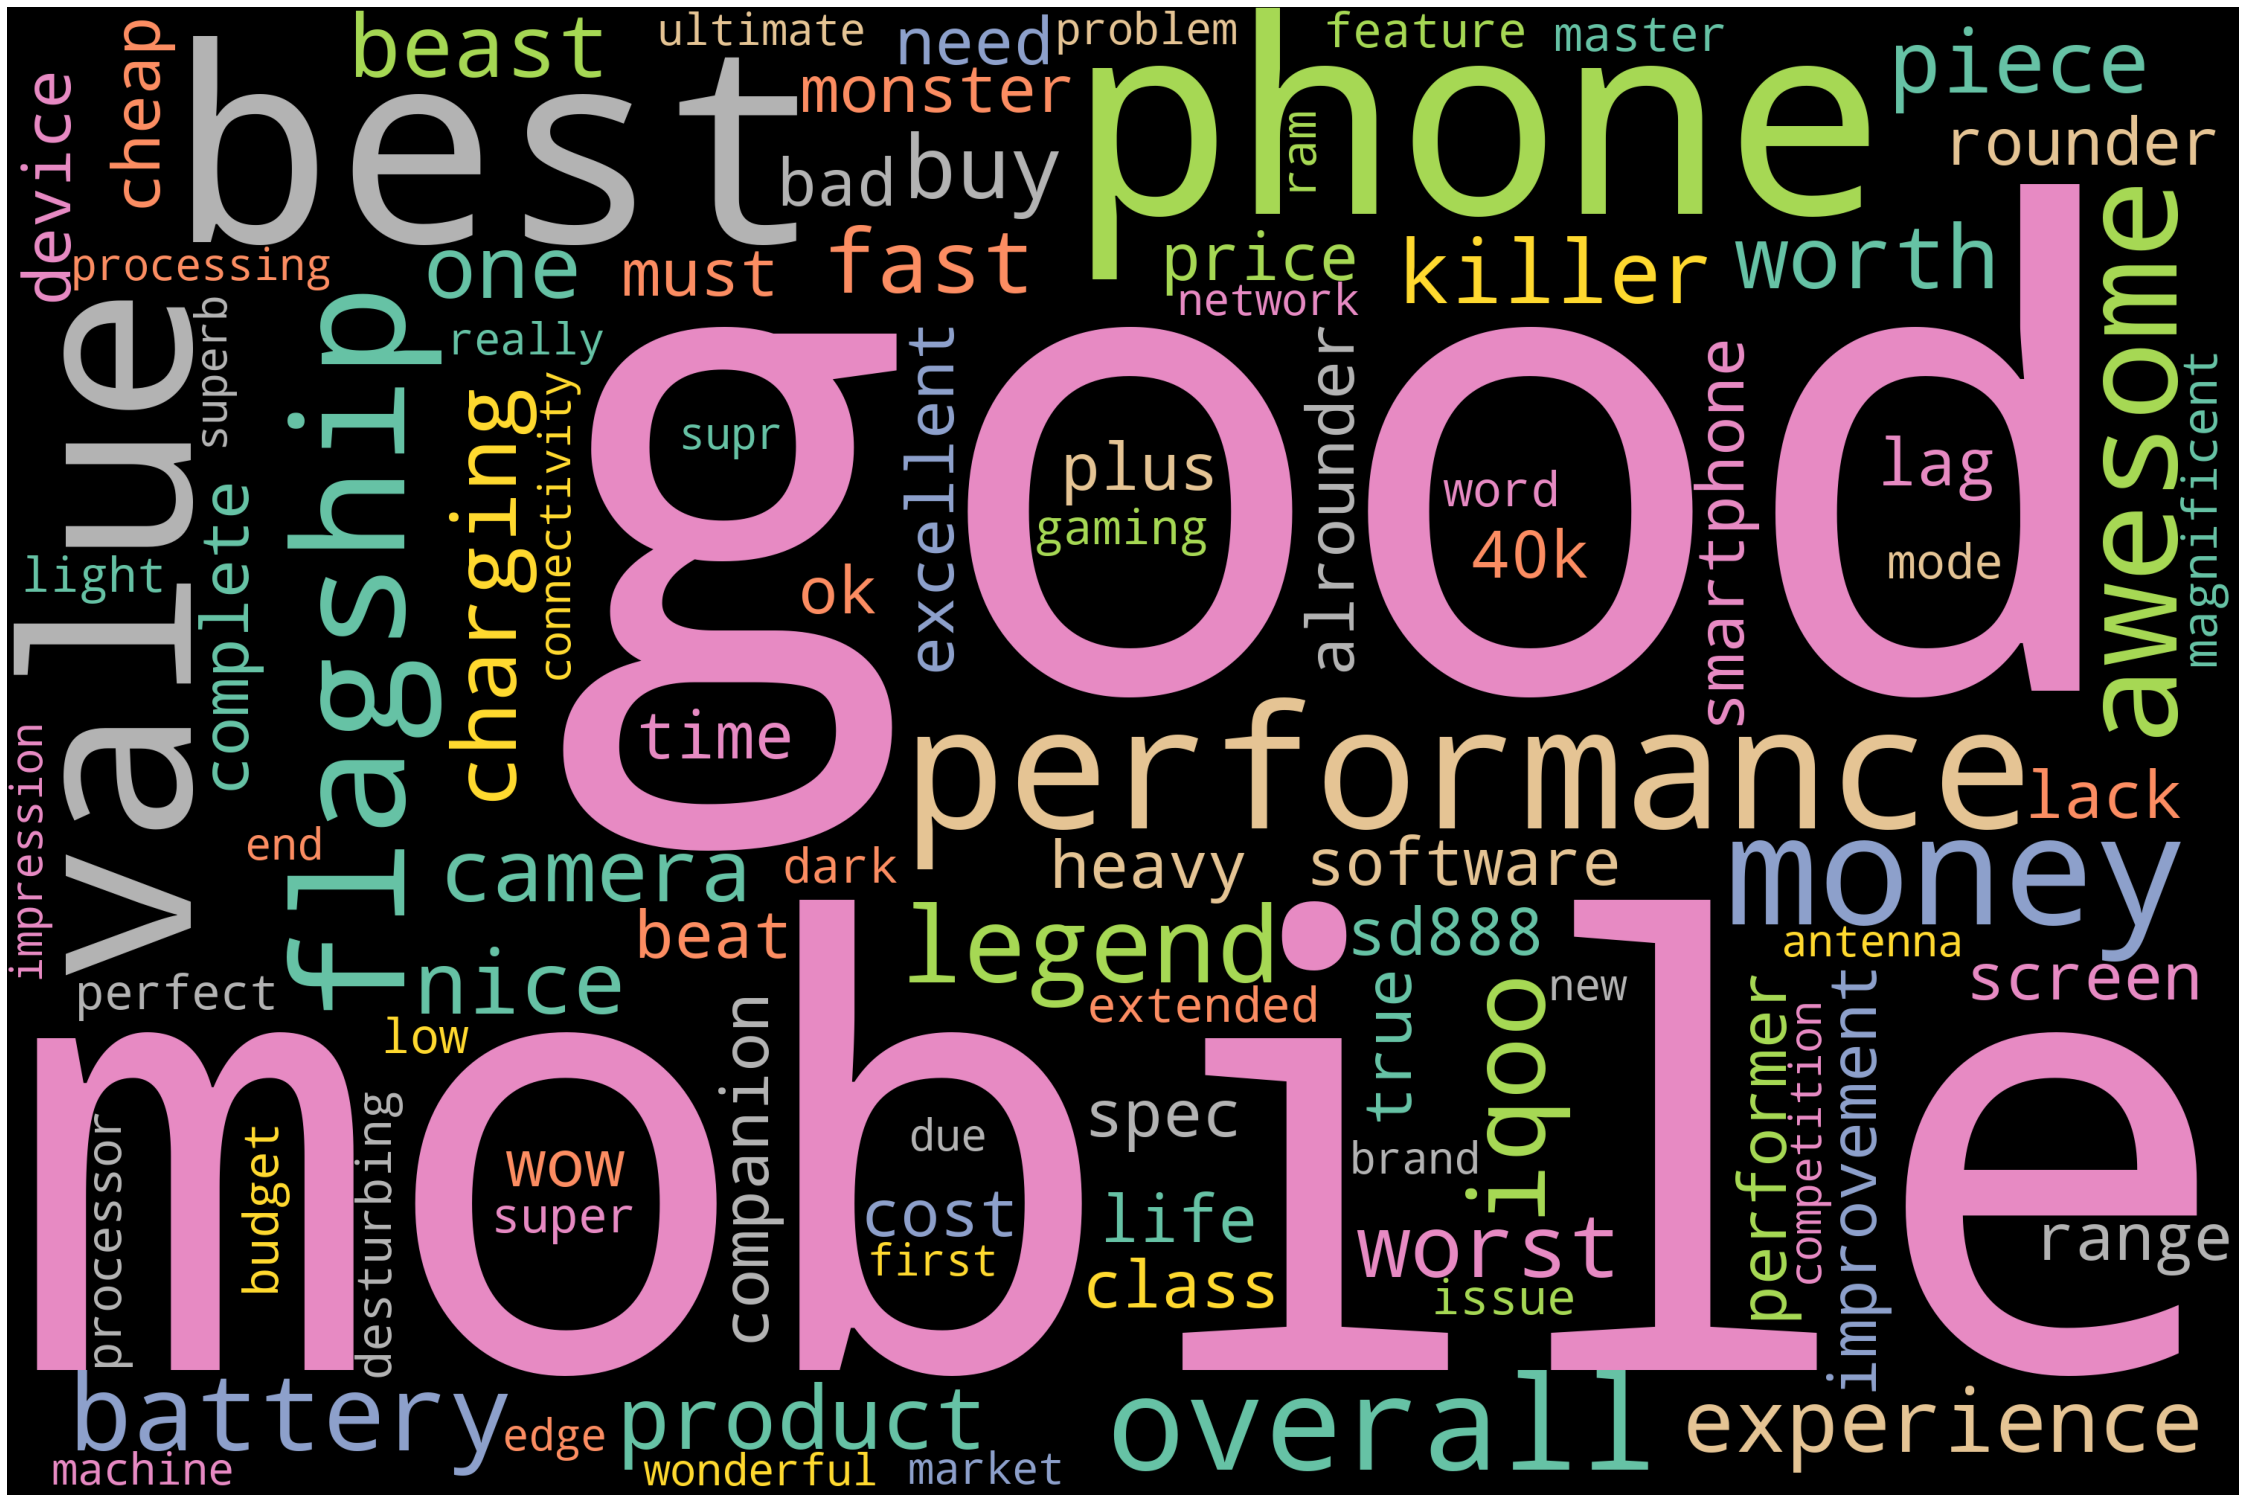

In [22]:
# Generate wordcloud
stopwords = STOPWORDS
stopwords.add('will')
wordcloud = WordCloud(width = 3000, height = 2000, background_color='black', max_words=100,colormap='Set2',stopwords=stopwords).generate(text)
# Plot
plot_cloud(wordcloud)